In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from math import exp
%matplotlib inline

In [34]:
df = pd.read_csv("HR_comma_sep.csv")

In [35]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [36]:
df.shape

(14999, 10)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [38]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [39]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [40]:
df['Department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

In [41]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

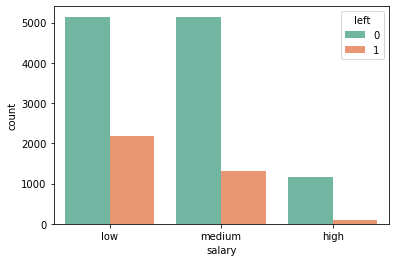

In [42]:
plt = sns.countplot(x = df['salary'], hue = df['left'], data = df, palette = "Set2")

 We can infer from the above that the people who were paid less has left the job in more numbers than the people who were taking medium or high salaries. Therefore retention is directly proportional to salary.

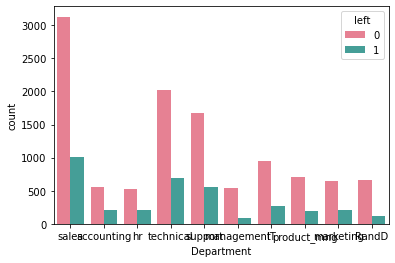

In [46]:
sns.countplot(x = df['Department'], hue = df['left'], data = df, palette = "husl")


Conclusions that can be drawn from above plot is that the people working in sales, technical and support departments has left the company most.

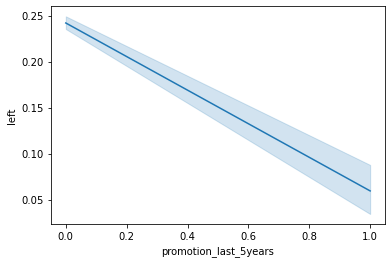

In [47]:
sns.lineplot(x = df['promotion_last_5years'], y = df['left'], data = df)

We can infer from the above plot that the promotion is inversely dependent on retention.

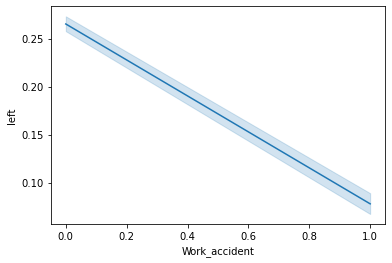

In [48]:
sns.lineplot(x = df['Work_accident'], y = df['left'], data = df)

We can infer from the above plot that the work accident is inversely dependent on retention.

In [52]:
df['Work_accident'].value_counts()

0    12830
1     2169
Name: Work_accident, dtype: int64

In [53]:
df['promotion_last_5years'].value_counts()

0    14680
1      319
Name: promotion_last_5years, dtype: int64

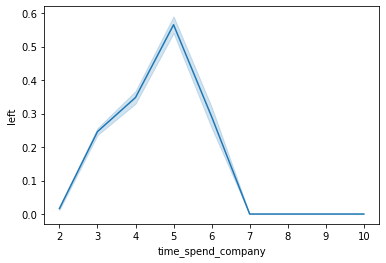

In [55]:
sns.lineplot(x = df['time_spend_company'], y = df['left'], data = df)

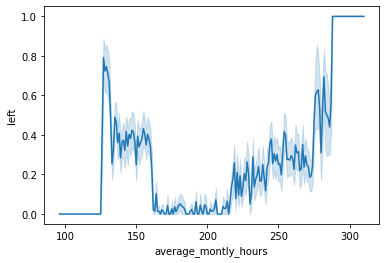

In [57]:
sns.lineplot(x = df['average_montly_hours'], y = df['left'], data = df)

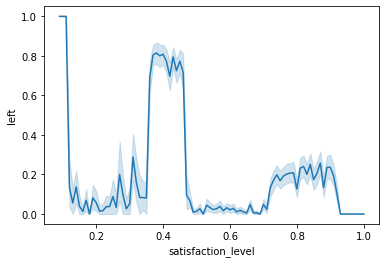

In [58]:
sns.lineplot(x = df['satisfaction_level'], y = df['left'], data = df)

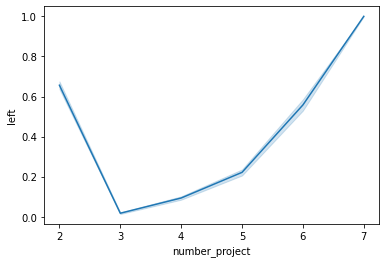

In [59]:
sns.lineplot(x = df['number_project'], y = df['left'], data = df)

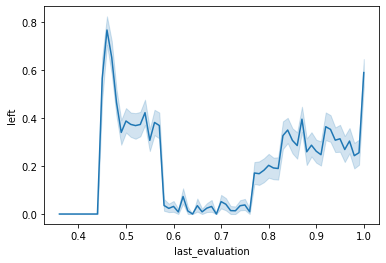

In [60]:
sns.lineplot(x = df['last_evaluation'], y = df['left'], data = df)

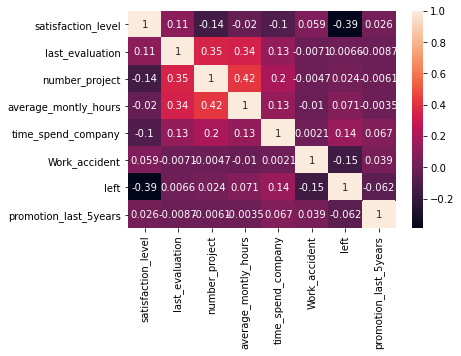

In [63]:
sns.heatmap(df.corr(), annot = True)

Since last evaluation is less correlated with retention we can drop that column

In [66]:
df = df.drop('last_evaluation', axis = 'columns')

In [67]:
df.head()

,satisfaction_level,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,2,157,3,0,1,0,sales,low
1,0.80,5,262,6,0,1,0,sales,medium
2,0.11,7,272,4,0,1,0,sales,medium
3,0.72,5,223,5,0,1,0,sales,low
4,0.37,2,159,3,0,1,0,sales,low


In [84]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
df['Department'] = labelencoder.fit_transform(df['Department'])
df['salary'] = labelencoder.fit_transform(df['salary'])

In [111]:
df = df[['satisfaction_level', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'Department', 'salary', 'left']]

### Splitting dataset into training and testing dataset

In [118]:
X = df['salary']
Y = df['left']

In [119]:
X

0        1
1        2
2        2
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: salary, Length: 14999, dtype: int32

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [121]:
# creating logistic regression model

# creating helper function to normalize data

def normalize(X):
    return X - X.mean()

# Method to make predictions

def predict(X, b0, b1):
    return np.array([1 / (1 + exp(-1*b0 + -1*b1*x)) for x in X])

# Method to train the model

def logistic_regression(X,Y):
    
    X = normalize(X)
    
    # Initializing variales
    b0 = 0
    b1 = 0
    L = 0.001
    epochs = 300
    
    for epoch in range(epochs):
        y_pred = predict(X, b0, b1)
        D_b0 = -2 * sum((Y - y_pred) * y_pred * (1 - y_pred)) # derivative of loss with respect to D_bo
        D_b1 = -2 * sum(X * (Y - y_pred) * y_pred * (1 - y_pred)) # derivative of loss with respect to D_bo
        
        # update b0 and b1
        
        b0 = b0 - L * D_b0
        b1 = b1 - L * D_b1
      
    return b0, b1


In [122]:
# Training the model

b0, b1 = logistic_regression(X_train, y_train)

# Making predictions

X_test_normalize = normalize(X_test)
y_pred = predict(X_test_normalize, b0, b1)
y_pred = [1 if p >= 0.5 else 0 for p in y_pred]

# The accuracy
accuracy = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test.iloc[i]:
        accuracy += 1
print(f"Accuracy = {accuracy / len(y_pred)}")


Accuracy = 0.7723333333333333
